## Customer Segmentation (Clustring Customers in diffrent segments)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
customer_df=pd.read_csv('segmentation data.csv')

In [4]:
customer_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
customer_df.drop('ID',axis=1,inplace=True)

In [6]:
customer_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


## Most of Cutomers are in 20-40 range

/home/orion/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

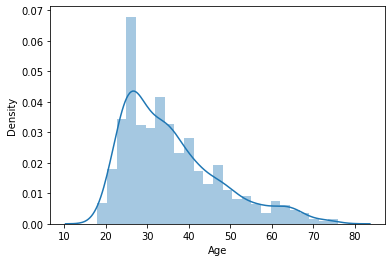

In [9]:
sn.distplot(customer_df['Age'])

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

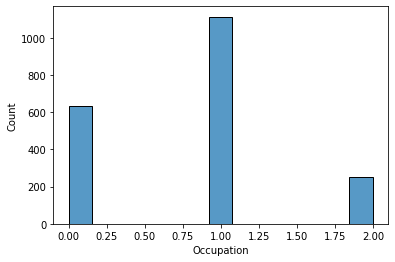

In [11]:
sn.histplot(customer_df['Occupation'])

### Most coustomer has salary between 100,000 - 170,000

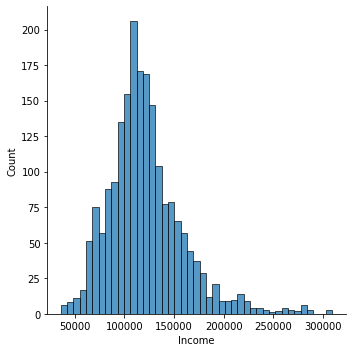

In [12]:
sn.displot(customer_df['Income'])

<AxesSubplot:xlabel='Age', ylabel='Income'>

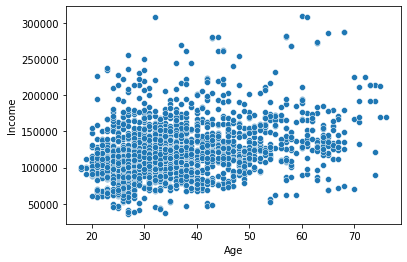

In [13]:
sn.scatterplot(x='Age',y='Income',data=customer_df)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

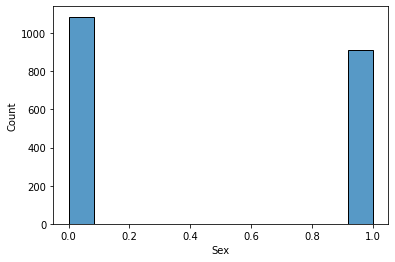

In [14]:
sn.histplot(customer_df['Sex'])

###  Need to scale data. scale between 0-1

In [6]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler=StandardScaler()
customer_scaled_df=scaler.fit_transform(customer_df[['Sex','Marital status','Age','Education','Income','Education','Settlement size']])


In [14]:
customer_scaled_df[:5]

array([[-0.91739884, -0.99302433,  2.65361447,  1.60432297,  0.09752361,
         1.60432297,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, -0.06337243,  0.78265438,
        -0.06337243,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, -0.06337243, -0.83320224,
        -0.06337243, -0.90972951],
       [-0.91739884, -0.99302433,  0.77591616, -0.06337243,  1.32838624,
        -0.06337243,  0.32129825],
       [-0.91739884, -0.99302433,  1.45871554, -0.06337243,  0.73693175,
        -0.06337243,  0.32129825]])

In [15]:
from sklearn.cluster import KMeans

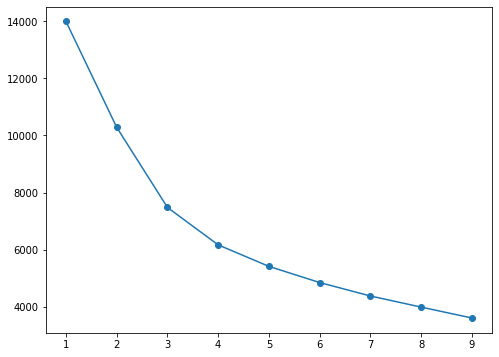

In [17]:
cluster_range=range(1,10)
cluster_error=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(customer_scaled_df)
    cluster_error.append(clusters.inertia_)
plt.figure(figsize=(8,6))
plt.plot(cluster_range,cluster_error,marker='o')

# using above Elbow method we can determine number of clusters [3,4]

In [18]:
k=3
clusters=KMeans(k)
clusters.fit(customer_scaled_df)
customer_df['clusterId']=clusters.labels_

In [19]:
customer_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusterId
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1


In [21]:
customer_df[customer_df.clusterId==0]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusterId
0,0,0,67,2,124670,1,2,0
8,0,1,61,2,151591,0,0,0
13,0,0,60,2,89374,0,0,0
18,1,1,44,2,261952,2,2,0
27,1,1,42,2,163025,1,1,0
...,...,...,...,...,...,...,...,...
1576,1,1,67,3,128343,0,0,0
1589,1,1,63,2,82734,0,0,0
1590,1,0,38,2,116816,0,0,0
1592,1,1,44,2,143343,1,1,0


In [22]:
customer_df[customer_df.clusterId==1]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusterId
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
5,0,0,35,1,144848,0,0,1
6,0,0,53,1,156495,1,1,1
...,...,...,...,...,...,...,...,...
1987,0,0,25,0,66628,0,0,1
1991,0,0,54,1,128537,1,0,1
1994,0,0,45,1,113414,1,0,1
1997,0,0,31,0,86400,0,0,1


In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
h_clusters=AgglomerativeClustering(3)
h_clusters.fit(customer_scaled_df)
customer_df['clusterID']=h_clusters.labels_

In [25]:
customer_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusterId,clusterID
0,0,0,67,2,124670,1,2,0,1
1,1,1,22,1,150773,1,2,2,2
2,0,0,49,1,89210,0,0,1,0
3,0,0,45,1,171565,1,1,1,0
4,0,0,53,1,149031,1,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,2,0
1996,1,1,27,1,117744,1,0,2,2
1997,0,0,31,0,86400,0,0,1,0
1998,1,1,24,1,97968,0,0,2,2


In [26]:
customer_df[customer_df.clusterID==0]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusterId,clusterID
2,0,0,49,1,89210,0,0,1,0
3,0,0,45,1,171565,1,1,1,0
4,0,0,53,1,149031,1,1,1,0
5,0,0,35,1,144848,0,0,1,0
6,0,0,53,1,156495,1,1,1,0
...,...,...,...,...,...,...,...,...,...
1993,1,0,38,1,87670,0,0,2,0
1994,0,0,45,1,113414,1,0,1,0
1995,1,0,47,1,123525,0,0,2,0
1997,0,0,31,0,86400,0,0,1,0
